##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE177482**

file previously downloaded:
* GSE177482_RAW.tar

unzipped using 
``` bash
tar -xvf GSE177482_RAW.tar
```

This gives the following files: 
* GSM5374920_filtered_feature_bc_matrix.h5
* GSM5374920_biopsy219.txt.gz

Then used gunzip to remove gz from text file

Try loading in data from h5 

Data is from one patient with triple negative breast cancer

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE177482')
getwd()

[1] "/scratch/user/s4436039/scdata/GSE177482"

[1] "/scratch/user/s4436039/scdata/GSE177482"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
library(hdf5r)

In [4]:
#load all datasets
TNBC.data <- Read10X_h5("GSM5374920_filtered_feature_bc_matrix.h5")

In [5]:
head(colnames(TNBC.data))

[1] "AAACCCATCTGTCCCA-1" "AAACGAAAGGACCCAA-1" "AAACGCTCAAGAGCTG-1"
[4] "AAAGTCCGTACCCAGC-1" "AAATGGAGTGTTAAAG-1" "AACAACCAGATCGCTT-1"

In [6]:
#Add dataset info to colnames
colnames(TNBC.data) <- paste0("GSE177482_TNBC_", colnames(TNBC.data))

In [7]:
head(colnames(TNBC.data))

[1] "GSE177482_TNBC_AAACCCATCTGTCCCA-1" "GSE177482_TNBC_AAACGAAAGGACCCAA-1"
[3] "GSE177482_TNBC_AAACGCTCAAGAGCTG-1" "GSE177482_TNBC_AAAGTCCGTACCCAGC-1"
[5] "GSE177482_TNBC_AAATGGAGTGTTAAAG-1" "GSE177482_TNBC_AACAACCAGATCGCTT-1"

In [9]:
#create seperate seurat object for each sample
TNBC <- CreateSeuratObject(counts = TNBC.data, project = "GSE177482", min.features = 200)
#add metadata to sample
TNBC@meta.data$sample_type <- "tumour"
TNBC@meta.data$cancer_type <- "TNBC"
TNBC@meta.data$patient_id <- "pt_1"
TNBC@meta.data$sample_id <- "GSE177482_TNBC"

In [10]:
head(TNBC@meta.data) 

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
GSE177482_TNBC_AAACCCATCTGTCCCA-1,GSE177482,1040,534,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AAACGAAAGGACCCAA-1,GSE177482,1787,218,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AAACGCTCAAGAGCTG-1,GSE177482,809,405,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AAAGTCCGTACCCAGC-1,GSE177482,4571,1608,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AAATGGAGTGTTAAAG-1,GSE177482,869,515,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AACAACCAGATCGCTT-1,GSE177482,1186,553,tumour,TNBC,pt_1,GSE177482_TNBC


In [11]:
TNBC
head(TNBC@meta.data)
tail(TNBC@meta.data)

An object of class Seurat 
33538 features across 691 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 1 layer present: counts

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
GSE177482_TNBC_AAACCCATCTGTCCCA-1,GSE177482,1040,534,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AAACGAAAGGACCCAA-1,GSE177482,1787,218,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AAACGCTCAAGAGCTG-1,GSE177482,809,405,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AAAGTCCGTACCCAGC-1,GSE177482,4571,1608,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AAATGGAGTGTTAAAG-1,GSE177482,869,515,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_AACAACCAGATCGCTT-1,GSE177482,1186,553,tumour,TNBC,pt_1,GSE177482_TNBC


,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
GSE177482_TNBC_TTTCCTCTCCTAGAGT-1,GSE177482,1135,428,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_TTTCGATGTAGCTAAA-1,GSE177482,606,363,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_TTTGACTCAGTTCTAG-1,GSE177482,6565,2305,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_TTTGACTGTTCAGGTT-1,GSE177482,3785,1447,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_TTTGTTGCAGACTCTA-1,GSE177482,517,238,tumour,TNBC,pt_1,GSE177482_TNBC
GSE177482_TNBC_TTTGTTGGTATCGAAA-1,GSE177482,637,328,tumour,TNBC,pt_1,GSE177482_TNBC


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


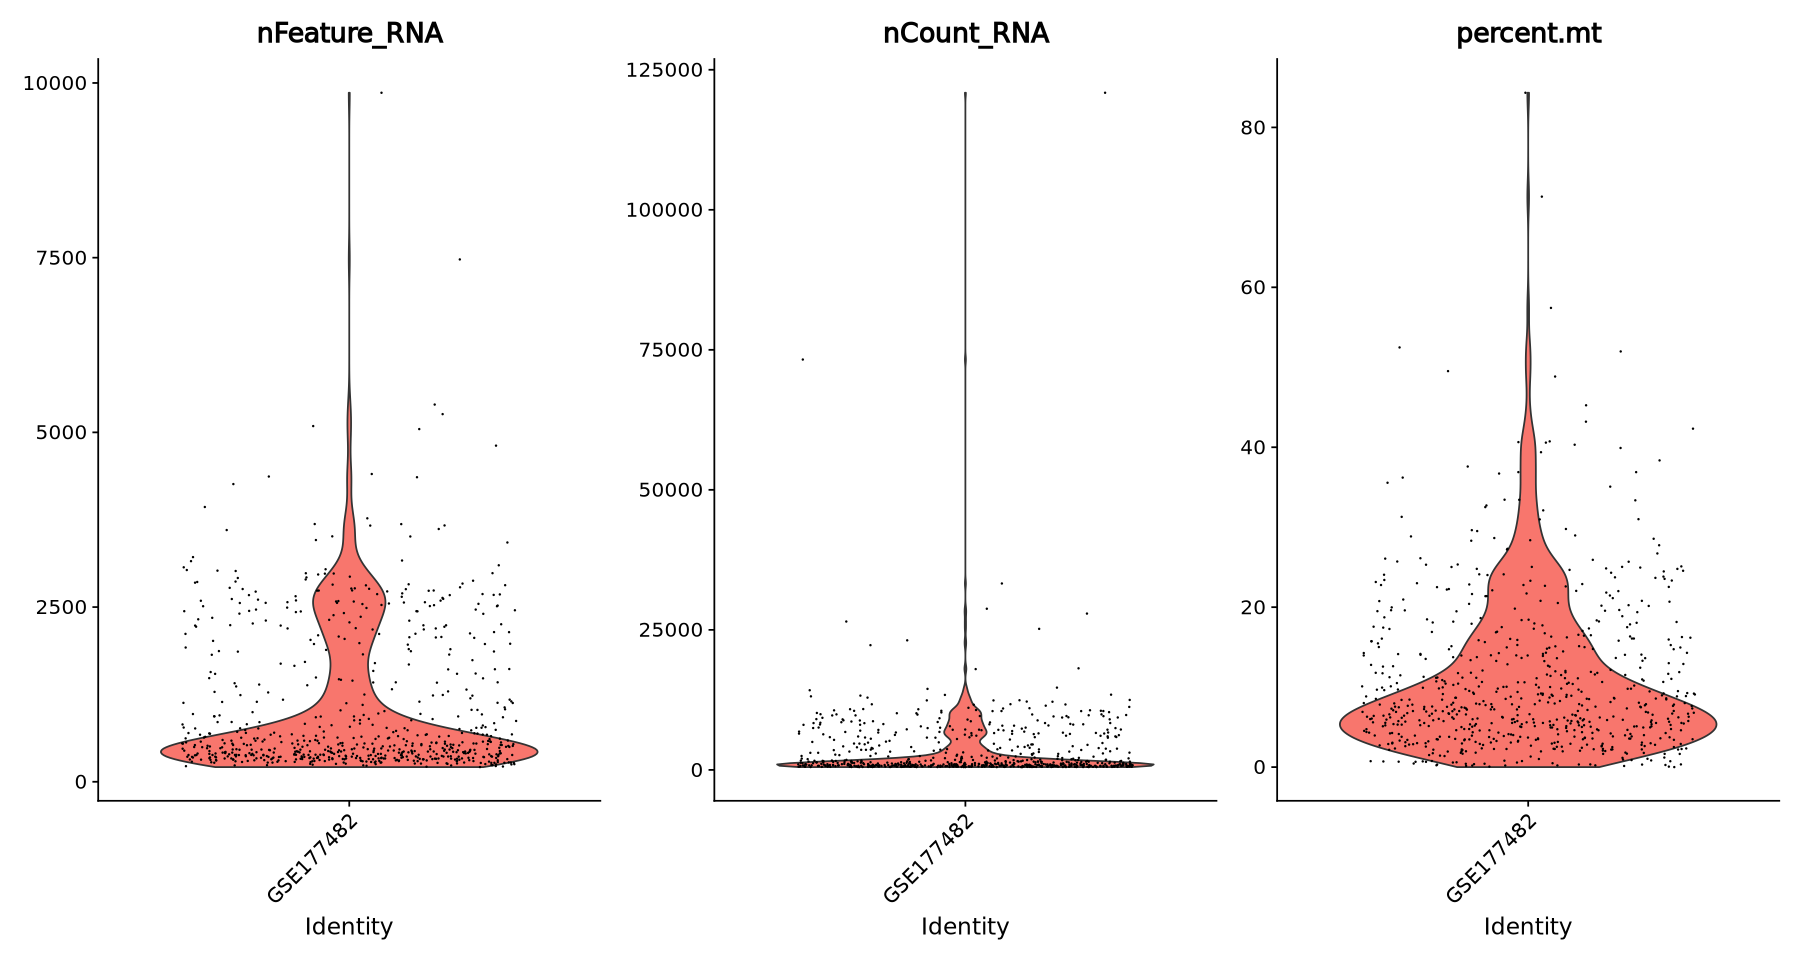

In [12]:
#QC Steps 
TNBC[["percent.mt"]] <- PercentageFeatureSet(TNBC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(TNBC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [13]:
#Normalise the data
TNBC <- NormalizeData(TNBC)

Normalizing layer: counts



In [14]:
#Find variable features
TNBC <- FindVariableFeatures(TNBC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts



In [15]:
#Scale the data
TNBC <- ScaleData(TNBC, vars.to.regress = c("percent.mt", "nCount_RNA"))

Regressing out percent.mt, nCount_RNA



Centering and scaling data matrix



In [17]:
#Run PCA
TNBC <- RunPCA(TNBC, features = VariableFeatures(object = TNBC))

PC_ 1 
Positive:  MALAT1, PTPRC, NEAT1, FOS, XIST, TNFAIP3, IL32, RNF213, JUNB, TRAC 
	   TCF7, TRBC2, NKTR, ZFP36, KIAA1551, AKAP9, SYNE2, MACF1, SPOCK2, LAT 
	   LCK, UTRN, CTSW, AHNAK, SLC2A3, CD99, GIMAP7, KLF2, XAF1, GZMK 
Negative:  APP, TM4SF1, PTMS, FTL, TXN, DNER, SOX4, STMN1, FABP7, CCDC50 
	   CST3, COL5A2, VCAN, MARCKS, ADIRF, CD93, IFI6, S100A13, CKS1B, FCGRT 
	   CLU, LAPTM4B, ANGPTL7, CRYAB, APOE, GRN, CSRP2, TIMP3, PTX3, BRI3 
PC_ 2 
Positive:  TM4SF1, PTMA, APP, DNER, FABP7, SOX4, LMNA, S100A6, HMGB2, IL32 
	   SYNE2, TRAC, SELENOW, SELENOM, STMN1, CKS1B, ADIRF, PPP1CC, CSRP2, ANGPTL7 
	   LAT, CLU, SPOCK2, LAPTM4B, NFIA, CALU, TRBC2, TIMP3, ACTG1, CRYAB 
Negative:  HLA-DRB1, HLA-DRA, HLA-DPA1, CD74, HLA-DRB5, HLA-DPB1, TYROBP, C1QB, LYZ, C1QC 
	   HLA-DQB1, HLA-DQA1, AIF1, C1QA, HLA-DQA2, APOC1, MS4A6A, FCER1G, HLA-DMA, APOE 
	   CST3, CD14, PSAP, CYBB, FCGR3A, CTSS, CD68, TMEM176B, CTSB, IGSF6 
PC_ 3 
Positive:  LILRB1, JCHAIN, FGD2, PHACTR1, IGHM, TBC1D9, CYB561A3, 

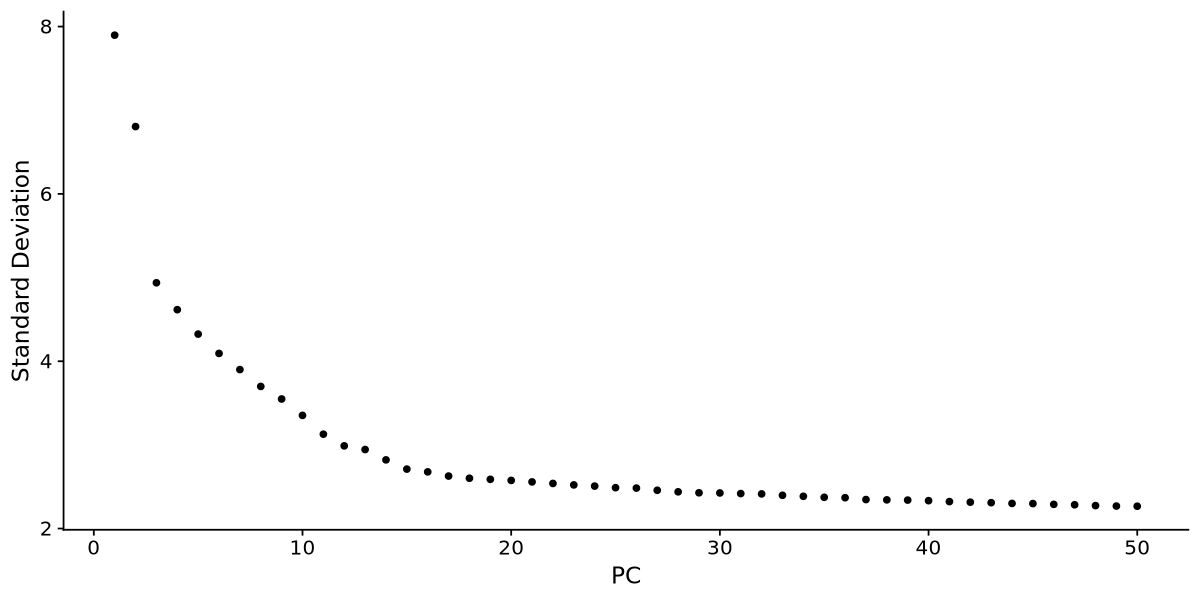

In [18]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(TNBC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [19]:
#Find neighbours (make sure number matches no. features chosen above)
TNBC <- FindNeighbors(TNBC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [20]:
#Run UMAP
TNBC <- RunUMAP(TNBC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


16:27:35 UMAP embedding parameters a = 0.9922 b = 1.112

16:27:35 Read 691 rows and found 40 numeric columns

16:27:35 Using Annoy for neighbor search, n_neighbors = 30

16:27:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:27:35 Writing NN index file to temp file /scratch/temp/9601976/RtmpkOHNuk/file678dd79a4d25f

16:27:35 Searching Annoy index using 1 thread, search_k = 3000

16:27:35 Annoy recall = 100%

16:27:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:27:36 Initializing from normalized Laplacian + noise (using RSpectra)

16:27:36 Commencing optimization for 500 epochs, with 28428 positive edges

16:27:37 Optimization finished



In [21]:
#Cluster, resolution here set to 0.2
TNBC <- FindClusters(TNBC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 691
Number of edges: 31345

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8903
Number of communities: 3
Elapsed time: 0 seconds


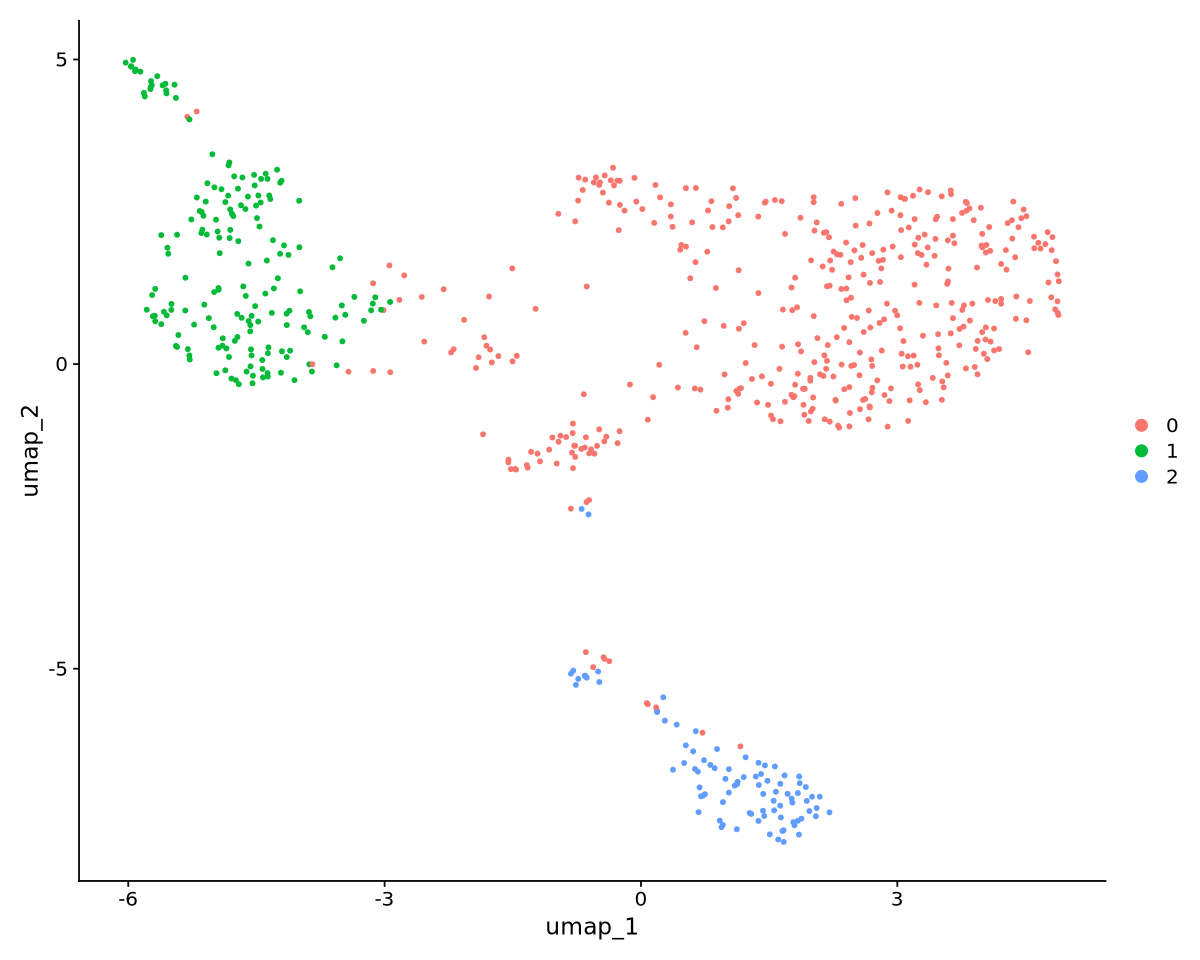

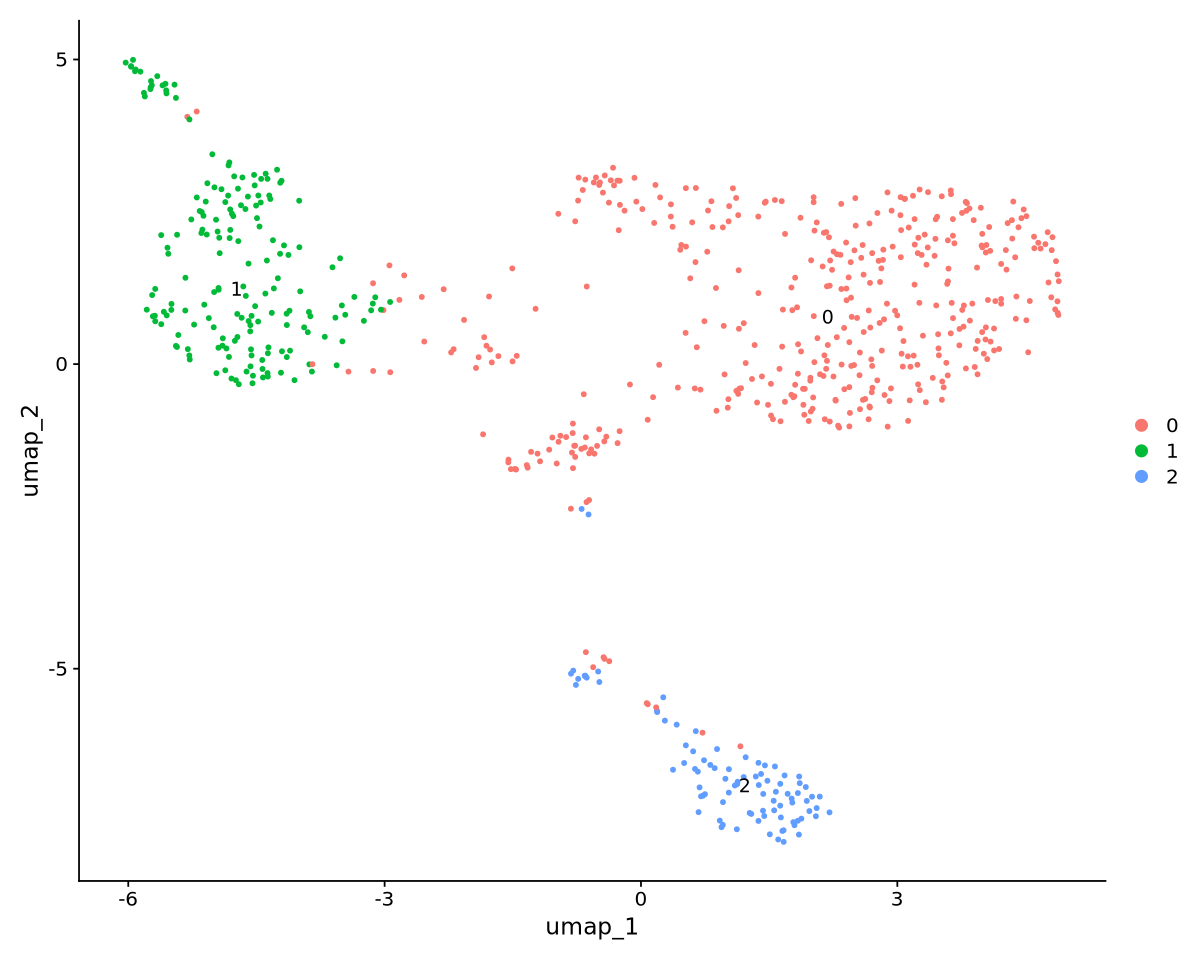

In [22]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(TNBC, reduction = "umap")
DimPlot(TNBC, reduction = "umap", label=TRUE)

In [23]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(TNBC, file = "/scratch/user/s4436039/scdata/GSE177482/GSE177482.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

Warning message:
“All cells have the same value (0) of “FCER1A””


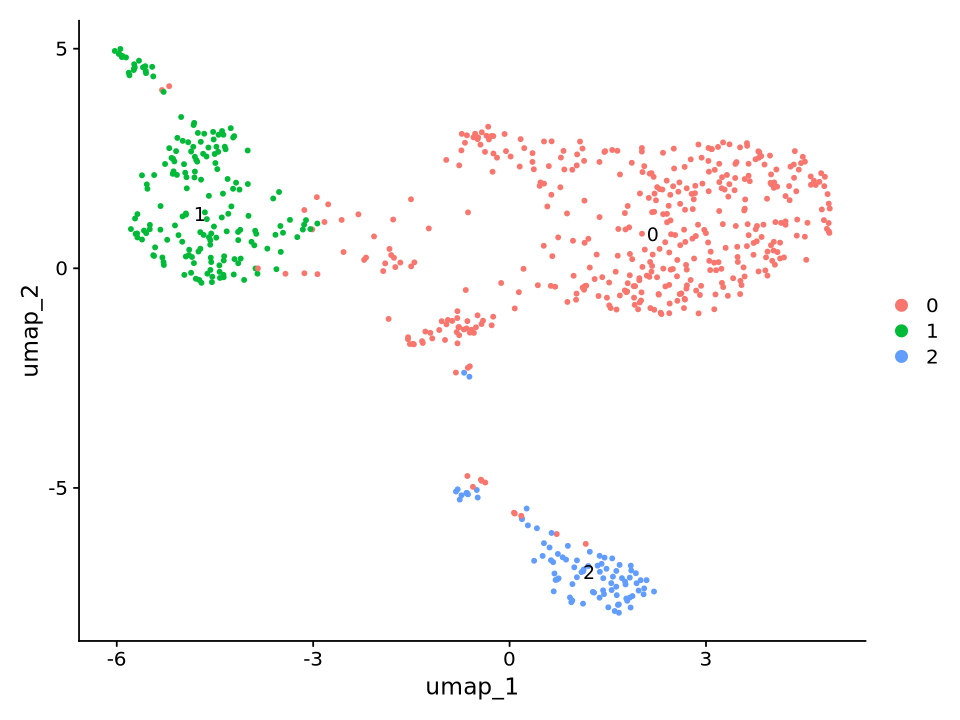

Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of FCER1A.”


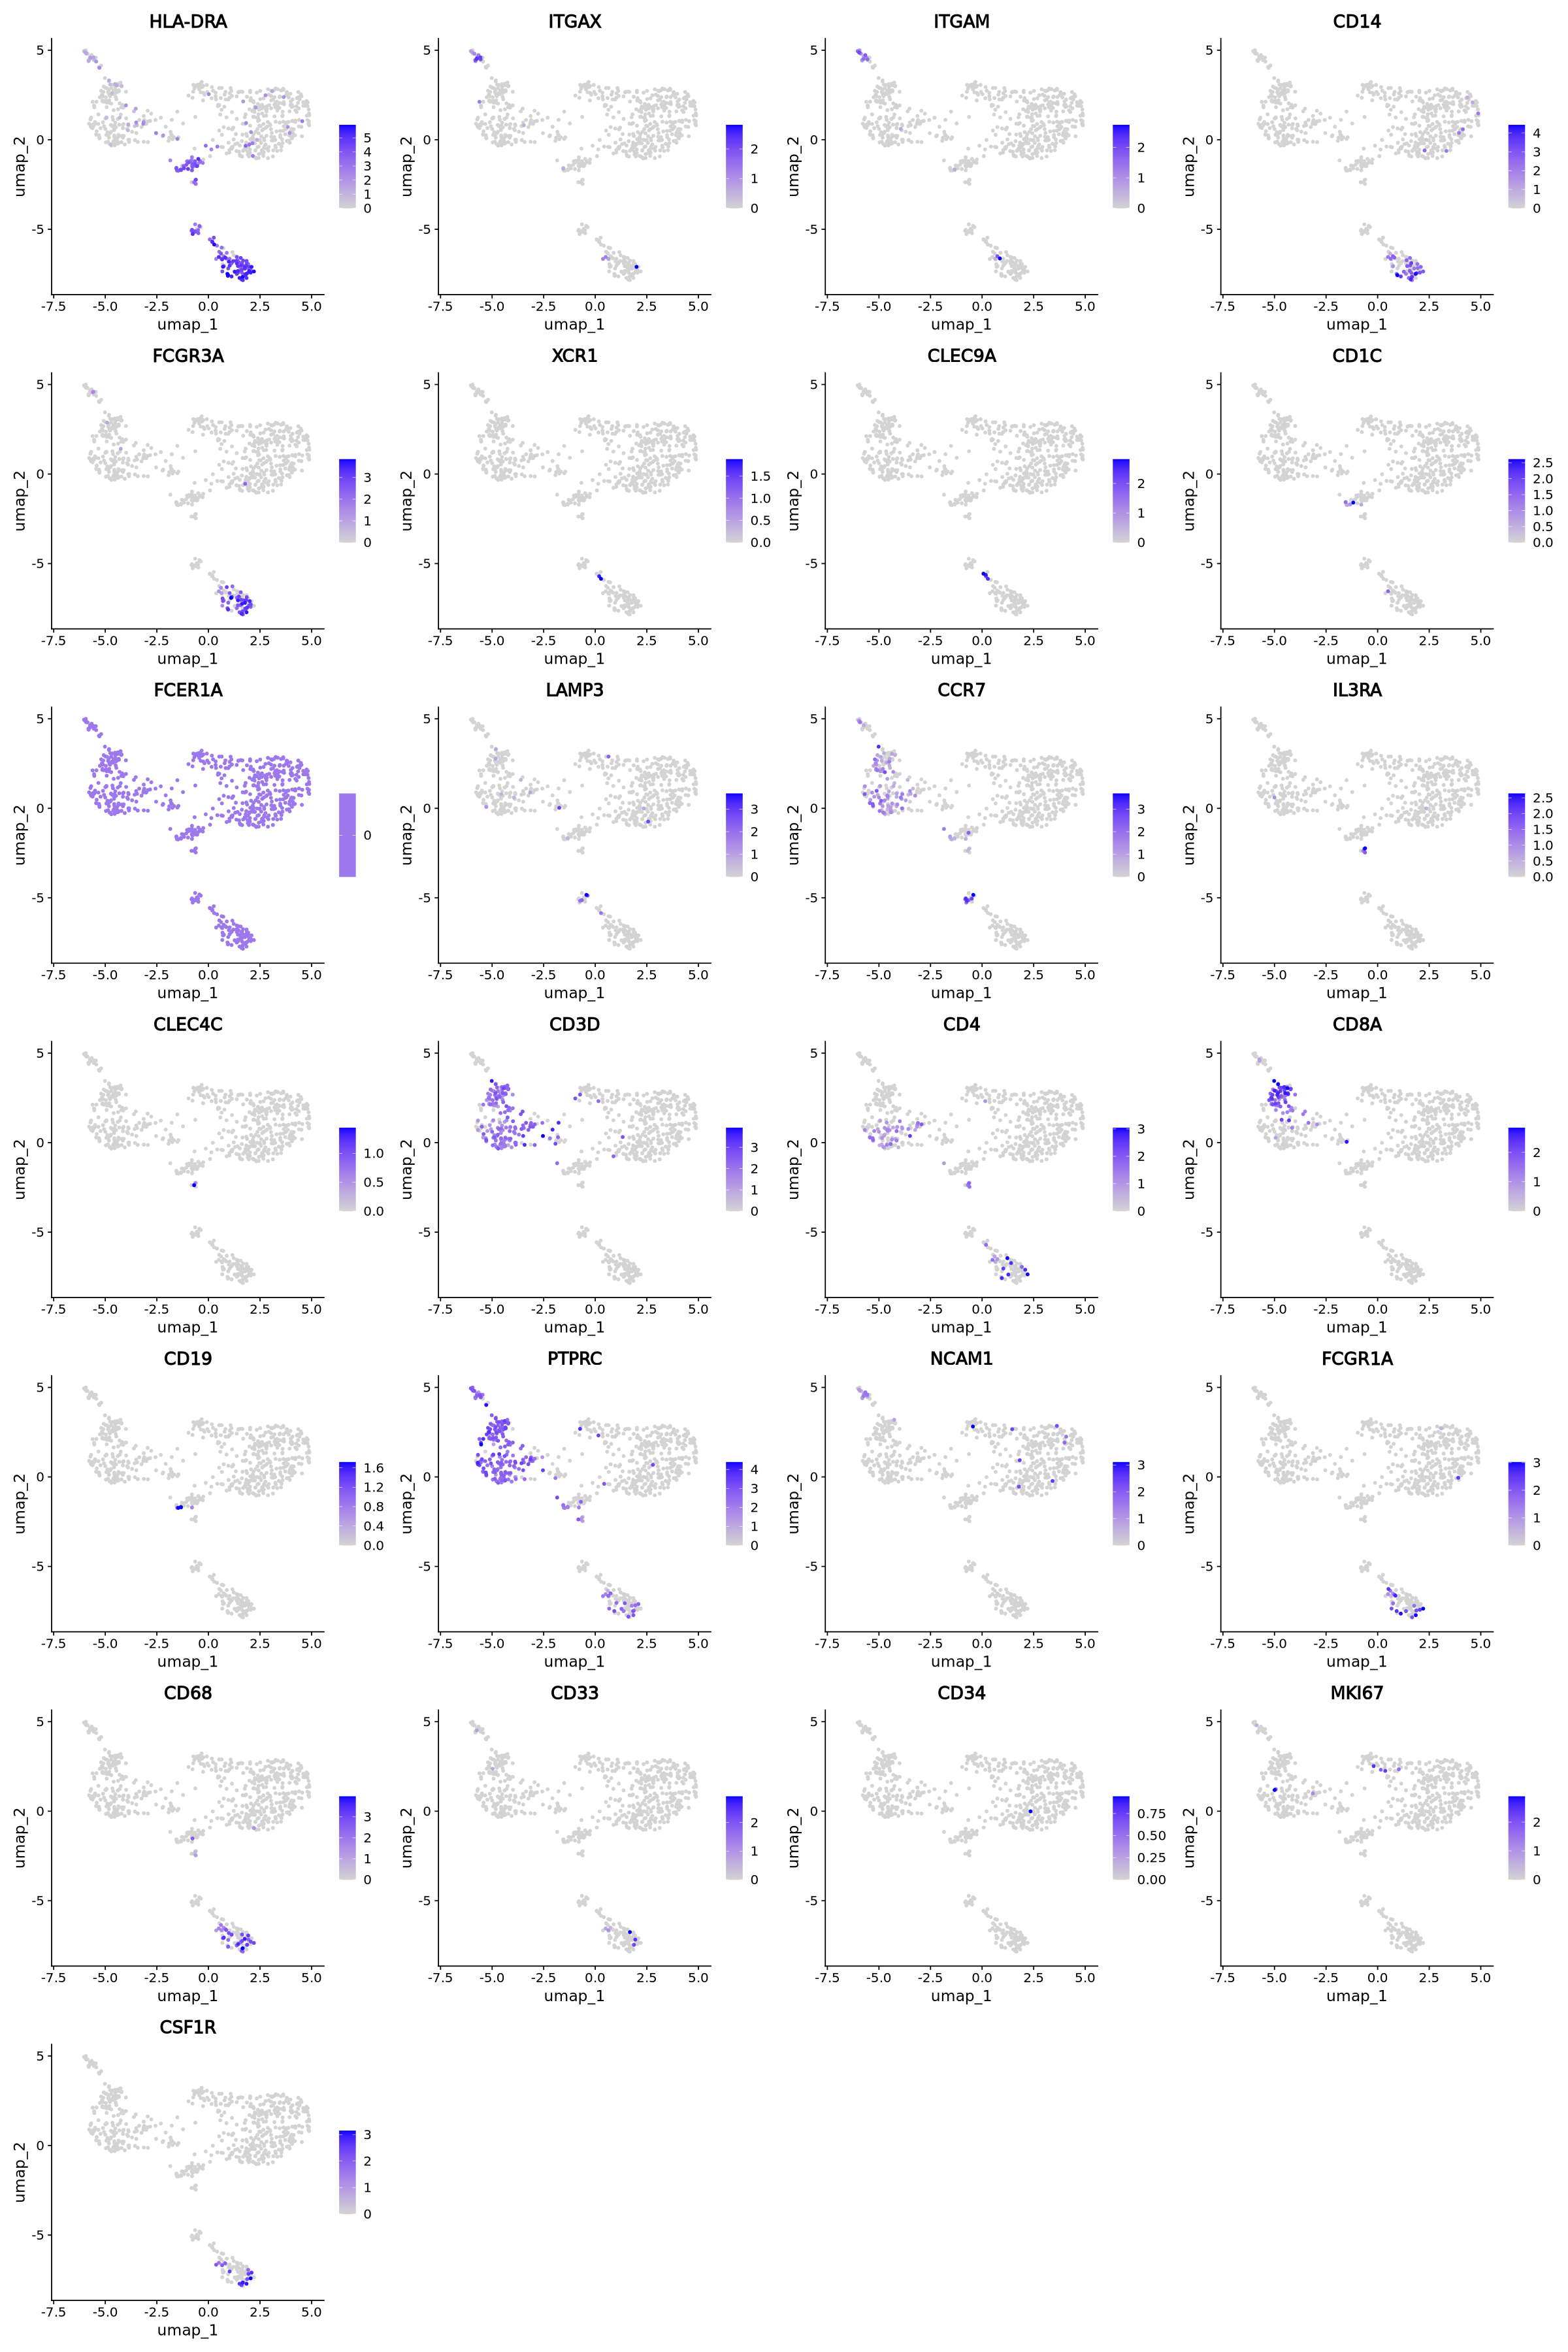

Warning message:
“Scaling data with a low number of groups may produce misleading results”


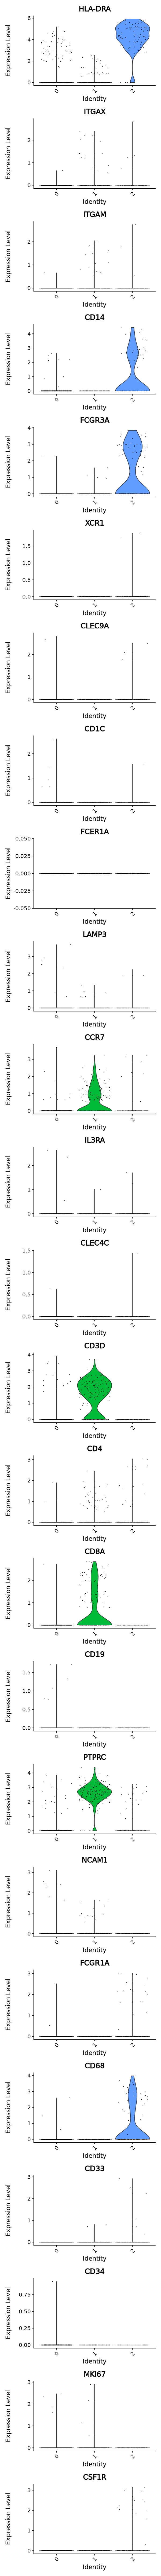

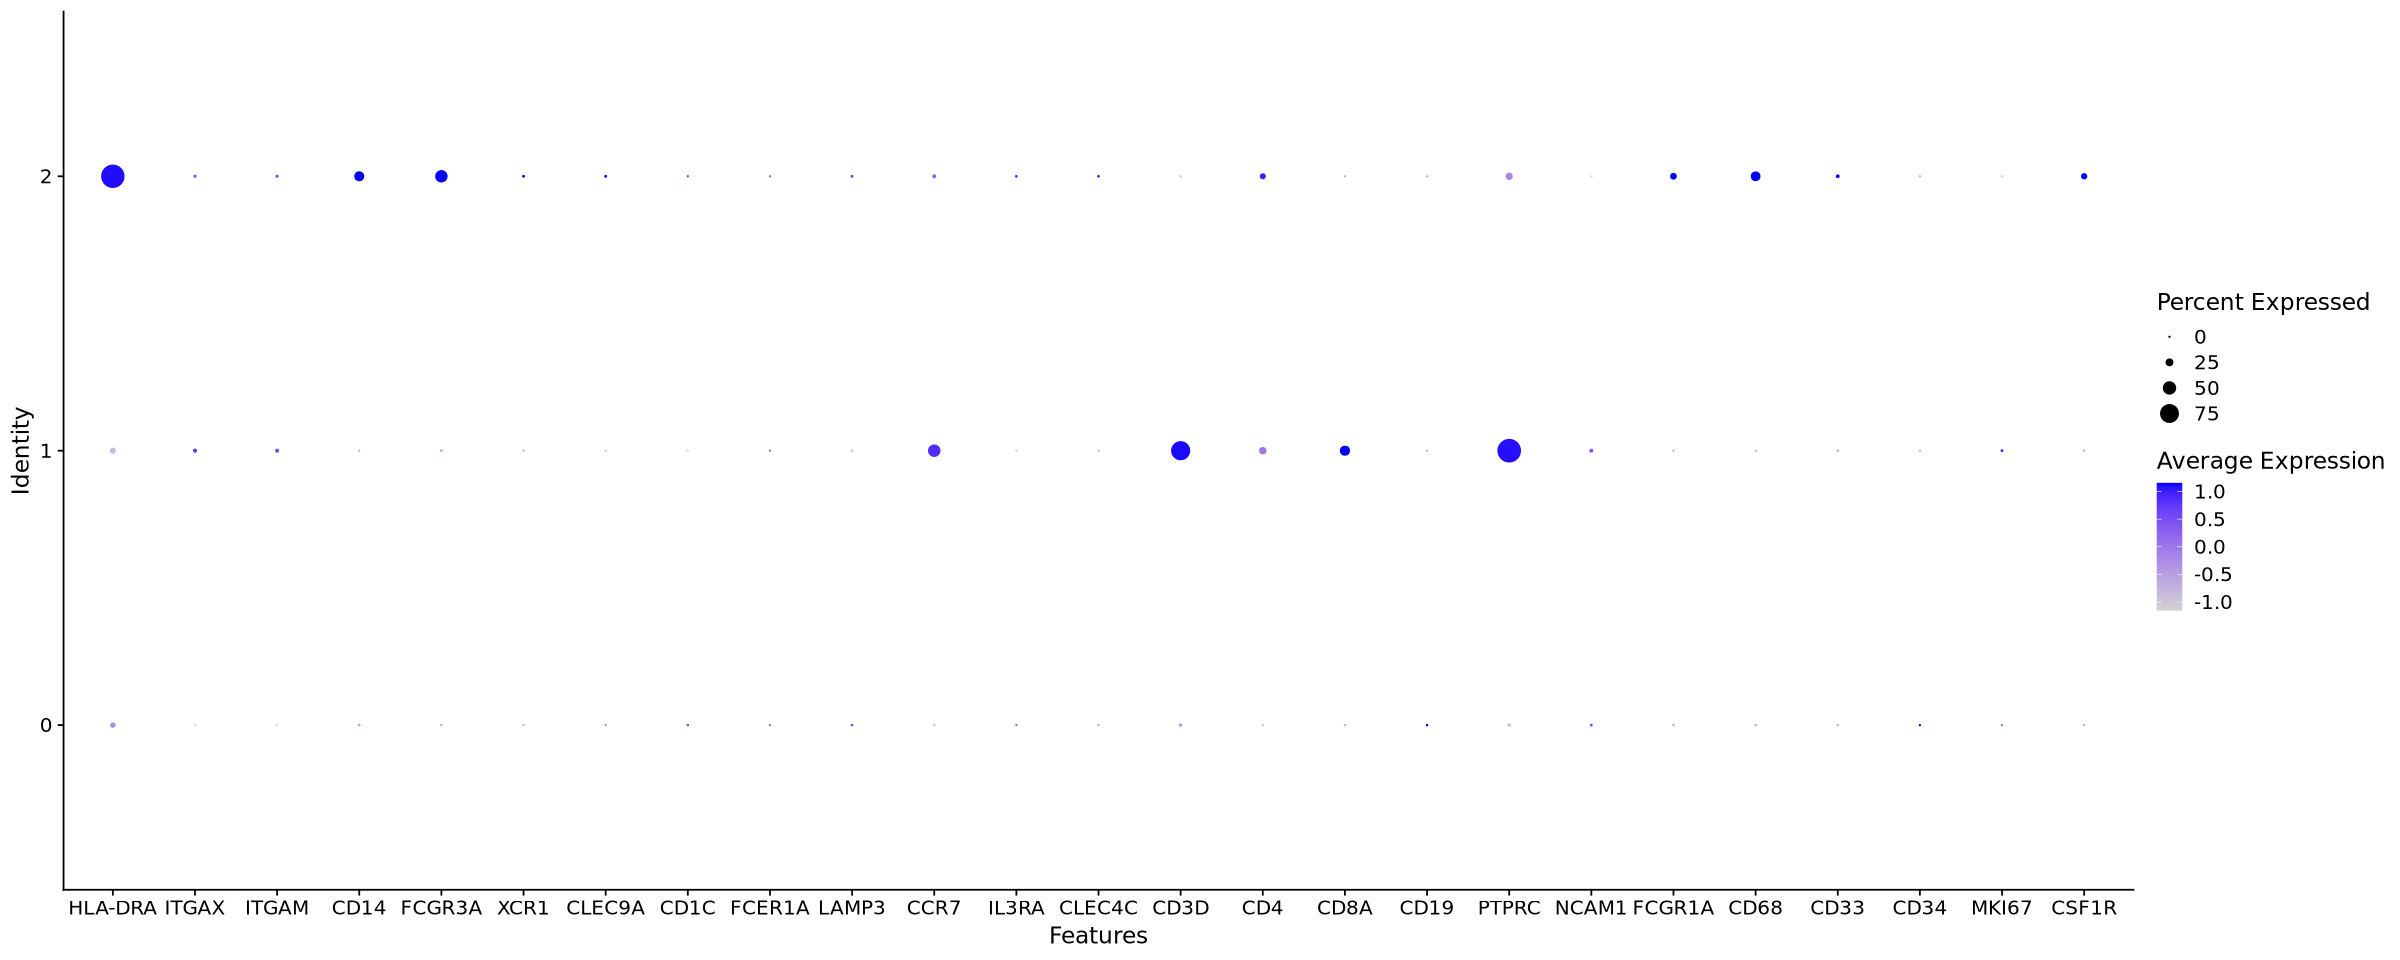

In [25]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(TNBC, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(TNBC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=5)
VlnPlot(TNBC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(TNBC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

This dataset has very few events, making decision to exclude from further analysis

#### Following the above then need to move entire GSE177482 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE177482/ /QRISdata/Q5935/nikita/scdata/GSE177482
```